In [1]:
import os, sys, pickle
%pylab inline
plt.style.use("default")

Populating the interactive namespace from numpy and matplotlib


In [3]:
base_dir = os.path.split(os.getcwd())[0]
print(base_dir)
(base_dir not in sys.path) and sys.path.append(base_dir)

/camp/lab/schaefera/working/tootoos/git/crick-osn-tracking-release


In [4]:
from importlib import reload
import classify
reload(classify)
from classify import get_output_root, classify

In [5]:
from run_decoding_delay import get_input_file_name, get_collection_file_name

In [14]:
with open(get_input_file_name("gamp5", 100), "rb") as f:
    data = pickle.load(f)
X, y = data["X"], array(data["y"])

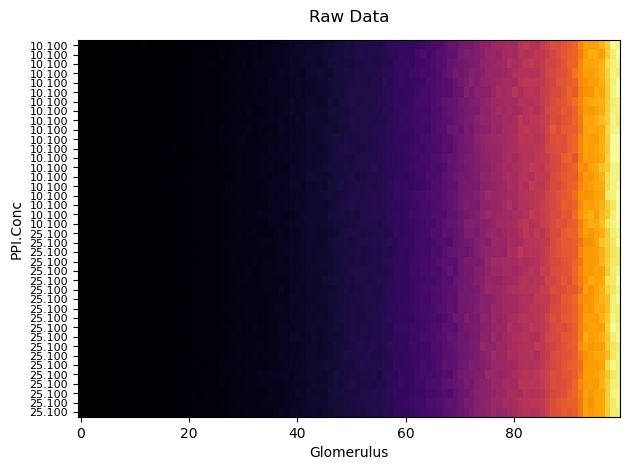

In [30]:
glom_order = lambda label: argsort(mean(X[y==label],axis=0))
matshow(X[:, glom_order("10.100")], cmap=cm.inferno, fignum=False)
axis("auto")
gca().xaxis.set_ticks_position("bottom")
gca().set_yticks(arange(len(y)))
gca().set_yticklabels(y, fontsize=8)
ylabel("PPI.Conc"); xlabel("Glomerulus"); title("Raw Data", pad=0)
tight_layout()


# Plot example cases

(-0.5, 99.5)

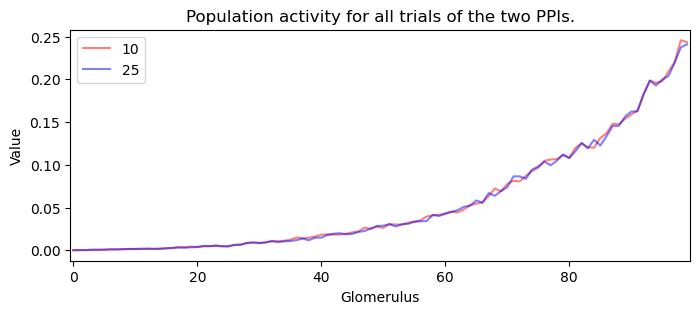

In [47]:
figure(figsize=(8,3))
h0 = plot(X[y==y[0]][0, glom_order("10.100")].T, color=[1,0,0,0.5]);
h1 = plot(X[y==y[-1]][0, glom_order("10.100")].T, color=[0,0,1,0.5]);
legend([h0[0], h1[0]], [y[0][:2], y[-1][:2]])
xlabel("Glomerulus")
ylabel("Value")
title("Population activity for all trials of the two PPIs.")
xlim(-0.5,99.5)

# Dimension reduction by PCA

In [48]:
U,S,Vt = linalg.svd(X,full_matrices=False)
print(f"Variance explained by first few PCs: {(cumsum(S**2)/sum(S**2))[:5]}")
coefs = X @ Vt.T

Variance explained by first few PCs: [0.99946327 0.99951392 0.99955945 0.99960401 0.99963957]


Text(0.5, 1.0, 'Data in PC space. PPI=10 ms is red.')

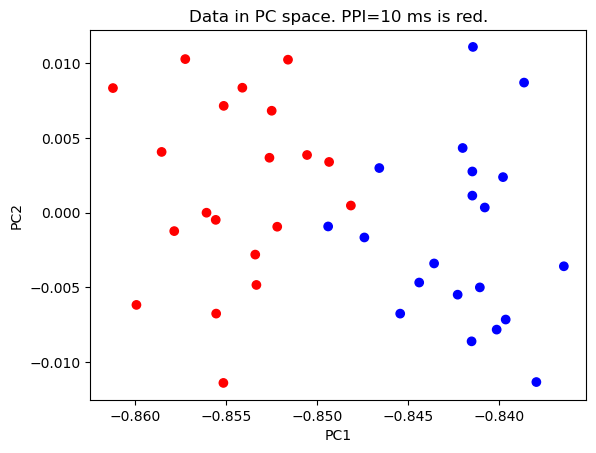

In [58]:
ppi_to_col = lambda ppi: "r" if ppi[:2] == "10" else "b"
scatter(coefs[:,0], coefs[:,1], c=[ppi_to_col(yi[:2]) for yi in y])
xlabel("PC1"); ylabel("PC2"); title(f"Data in PC space. PPI=10 ms is red.")

# Train Classifier

In [55]:
ppi = [yi[:2] for yi in y]
conf, labs, search = classify(X, ppi, n_cv=1)

INFO:classify:Setting random seed to 0.


INFO:classify:scaling='none' so leaving data unchanged.


INFO:classify:Starting 1 cross-validation runs.


INFO:classify:CV   1/1                C=1000  fit_intercept=True : 1.000


CV trial 1/1 confusion matrix:
2 . 
. 2 

Overall confusion matrix:
2 . 
. 2 


In [56]:
n  = 301
xr = linspace(min(coefs[:,0]), max(coefs[:,0]), n)
yr = linspace(min(coefs[:,1]), max(coefs[:,1]), n)
px, py = meshgrid(xr, yr)
z0  = mean(coefs[:,2])
pz  = search.best_estimator_.predict((Vt[:3].T @ [px.flatten(), py.flatten(), 0*px.flatten() + z0]).T).astype(int).reshape(px.shape)

Text(0.5, 1.0, 'Decision boundaries at PC3=0.000')

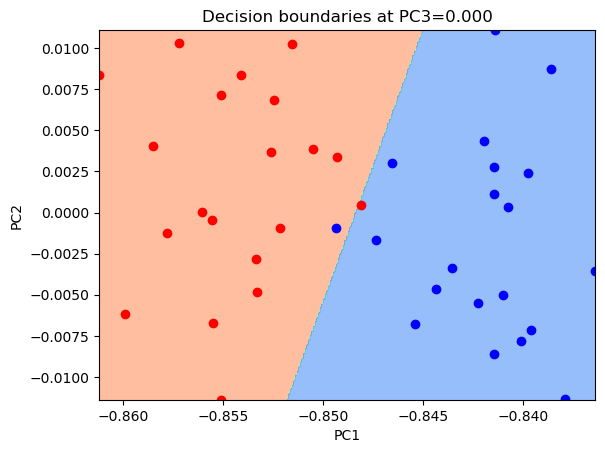

In [61]:
contourf(px, py, pz, levels=2, cmap=cm.rainbow_r, alpha=0.5)
axis("auto")
for i in range(coefs.shape[0]):
    plot(coefs[i,0], coefs[i,1], "o",  color=ppi_to_col(y[i][:2]))
xlabel("PC1"); ylabel("PC2"); title(f"Decision boundaries at PC3={z0:1.3f}")
